In [81]:
import numpy as np
import pandas as pd
import seaborn as sns

In [82]:
df = pd.read_csv("Salaries.csv")
df.head(2)

C:\Users\2419a\AppData\Local\Temp\ipykernel_11976\2585039687.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Salaries.csv")


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


In [83]:
df.shape

(148654, 13)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [85]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [86]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

### Removing missing values

In [87]:
# Method 1: Removing column
df = df.drop(columns=["Notes", "Status"])
df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [88]:
# Method 2: Dropping rows
df["BasePay"] = df["BasePay"].replace("Not Provided", np.nan)
df["BasePay"] = df["BasePay"].astype(float)
df = df.dropna(subset=["BasePay"])
df.isnull().sum()

Id                      0
EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

In [89]:
# Method 3: Replacing values with mean or median
df["Benefits"] = df["Benefits"].replace("Not Provided", np.nan)
df["Benefits"] = df["Benefits"].astype(float)
df["Benefits"].fillna(df["Benefits"].mean(), inplace=True)
df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

### Outliers

<Axes: >

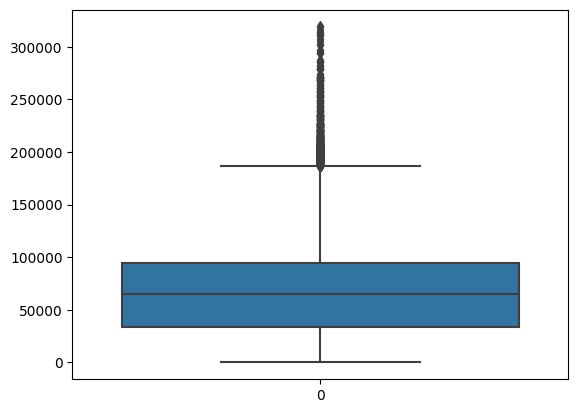

In [73]:
sns.boxplot(df["BasePay"])

In [78]:
sample = df["BasePay"]
Q1 = sample.quantile(0.25)
Q3 = sample.quantile(0.75)
IQR = Q3 - Q1
lb = Q1 - 1.5*IQR
ub = Q3 + 1.5*IQR
print("IQR = ",IQR)
print("Lower bound = ", lb)
print("Upper bound = ", ub)

IQR =  61102.850000000006
Lower bound =  -58066.07500000001
Upper bound =  186345.325


<Axes: ylabel='BasePay'>

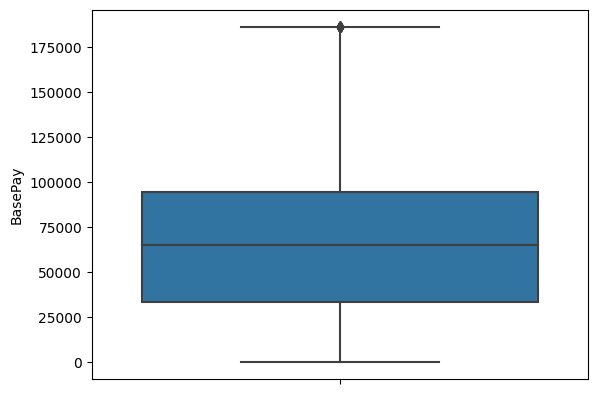

In [79]:
# Method 1: Removing records containing outliers
sample_filtered = sample[(sample >= lb) & (sample <= ub)]
sns.boxplot(y=sample_filtered)

<Axes: ylabel='BasePay'>

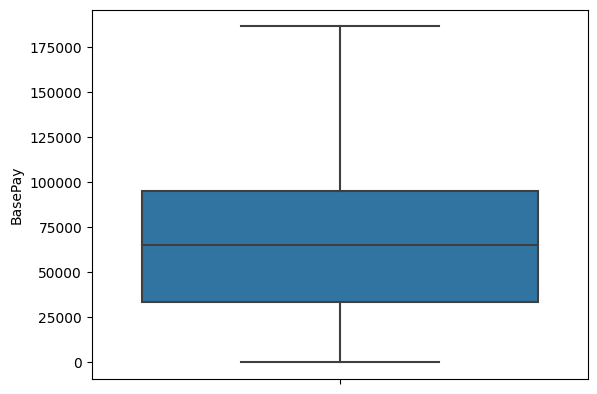

In [80]:
# Method 2: Setting the outliers to lower and upper bounds
sample_clipped=sample.clip(lb, ub)
sns.boxplot(y=sample_clipped)